# C.A.R.T (Classification and Regression Trees)
---
As the name suggests , CART can be used for both  classification and regression problems.
### How does CART find the best split?
There are two most common  ways to finf the best splits:-
1. Gini impurity
2. Entropy
#### Gini impurity
$Gini Impurity = 1- Gini = 1- \sum\limits_{i=1}^{n} p_i^2$
#### Entropy
$Entropy = -\sum\limits_{i=1}^{n} p_i log_2(p_i)$

In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree

import plotly.express as px
import plotly.graph_objects as go
import graphviz

In [5]:
df = pd.read_csv('../data/weatherAUS.csv')

df = df[pd.isnull(df['RainTomorrow'])==False]
df = df.fillna(df.mean())

df['RainTodayFlag'] = df['RainToday'].apply(lambda x: 1 if x=='Yes' else 0)
df['RainTomorrowFlag'] = df['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else 0)

In [12]:
def fitting(X, y, criterion, splitter, mdepth, clweight, minleaf):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model = tree.DecisionTreeClassifier(criterion=criterion,
                                        splitter=splitter,
                                        max_depth=mdepth,
                                        class_weight=clweight,
                                        min_samples_leaf=minleaf,
                                        random_state=0)
    clf = model.fit(X_train, y_train)

    pred_labels_tr = model.predict(X_train)
    pred_labels_te = model.predict(X_test)

    print('*************** Tree Summary ***************')
    print('Classes: ', clf.classes_)
    print('Tree Depth: ', clf.tree_.max_depth)
    print('No. of leaves: ', clf.tree_.n_leaves)
    print('No. of features: ', clf.n_features_)
    print('--------------------------------------------------------')
    print("")
    print('*************** Evaluation on Test Data ***************')
    
    
    
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("")
    
    print('*************** Evaluation on Training Data ***************')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    
    dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns, 
                                class_names=[str(list(clf.classes_)[0]), str(list(clf.classes_)[1])],
                                filled=True, 
                                rounded=True) 
    graph = graphviz.Source(dot_data)
    
    return X_train, X_test, y_train, y_test, clf, graph

In [13]:
def Plot_3D(X, X_test, y_test, clf, x1, x2, mesh_size, margin):
            
    mesh_size=mesh_size
    margin=margin

    x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
    y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    xx, yy = np.meshgrid(xrange, yrange)
            
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    fig = px.scatter_3d(x=X_test[x1], y=X_test[x2], z=y_test,
                     opacity=0.8, color_discrete_sequence=['black'])

    fig.update_layout(paper_bgcolor = 'white',
                      scene = dict(xaxis=dict(title=x1,
                                              backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'),
                                   yaxis=dict(title=x2,
                                              backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'
                                              ),
                                   zaxis=dict(title='Probability of Rain Tomorrow',
                                              backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0', 
                                              )))
    
    fig.update_traces(marker=dict(size=1))

    fig.add_traces(go.Surface(x=xrange, y=yrange, z=Z, name='CART Prediction',
                              colorscale='Jet',
                              reversescale=True,
                              showscale=False, 
                              contours = {"z": {"show": True, "start": 0.5, "end": 0.9, "size": 0.5}}))
    fig.show()
    return fig

### CART classification model using Gini Impurity

In [14]:
X=df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
      'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',  
      'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTodayFlag']]
y=df['RainTomorrowFlag'].values

X_train, X_test, y_train, y_test, clf, graph = fitting(X, y, 'gini', 'best',
                                                        mdepth=3,
                                                        clweight=None,
                                                        minleaf=1000)

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  3
No. of leaves:  8
No. of features:  17
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.828439818559021
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     22067
           1       0.76      0.34      0.47      6372

    accuracy                           0.83     28439
   macro avg       0.80      0.65      0.68     28439
weighted avg       0.82      0.83      0.80     28439

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.8278214392460924
              precision    recall  f1-score   support

           0       0.83      0.97      0.90     88249
           1       0.76      0.34      0.47     25505

    accuracy                           0.83    113754
   macro avg       0.80      0.65    

/home/kansih/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning:

The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.



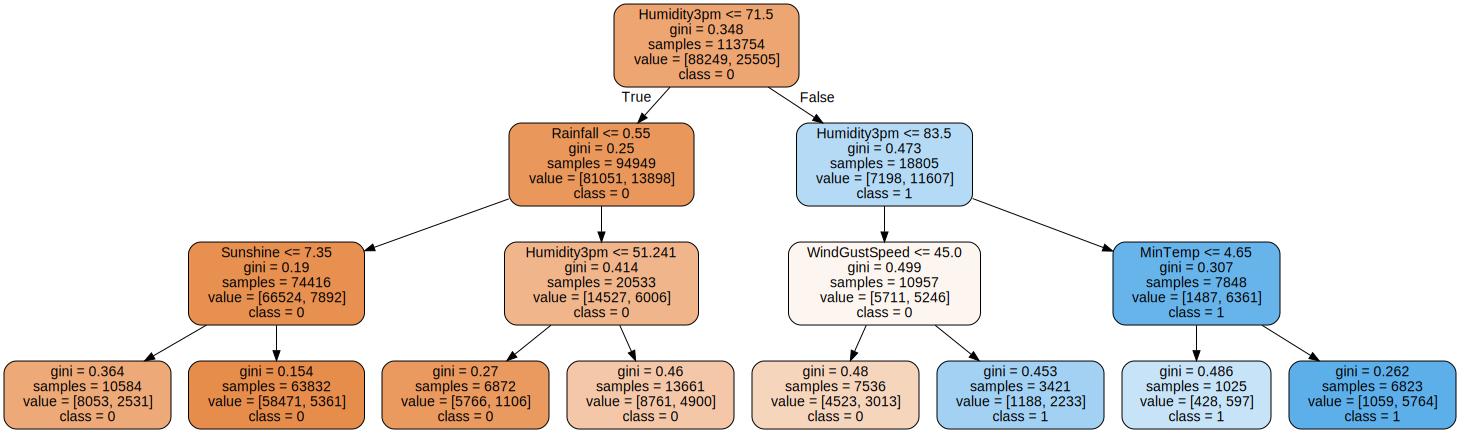

In [16]:
graph

### CART classification model using Gini Impurity and 2 features

In [17]:
X = df[['WindGustSpeed', 'Humidity3pm']]
y = df['RainTomorrowFlag'].values

X_train, X_test, y_train, y_test, clf, graph = fitting(X, y, 'gini', 'best',
                                                        mdepth = 3,
                                                        clweight = None,
                                                        minleaf = 1000)

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  3
No. of leaves:  8
No. of features:  2
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.828439818559021
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     22067
           1       0.76      0.34      0.47      6372

    accuracy                           0.83     28439
   macro avg       0.80      0.65      0.68     28439
weighted avg       0.82      0.83      0.80     28439

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.8278214392460924
              precision    recall  f1-score   support

           0       0.83      0.97      0.90     88249
           1       0.76      0.34      0.47     25505

    accuracy                           0.83    113754
   macro avg       0.80      0.65     

/home/kansih/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning:

The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.



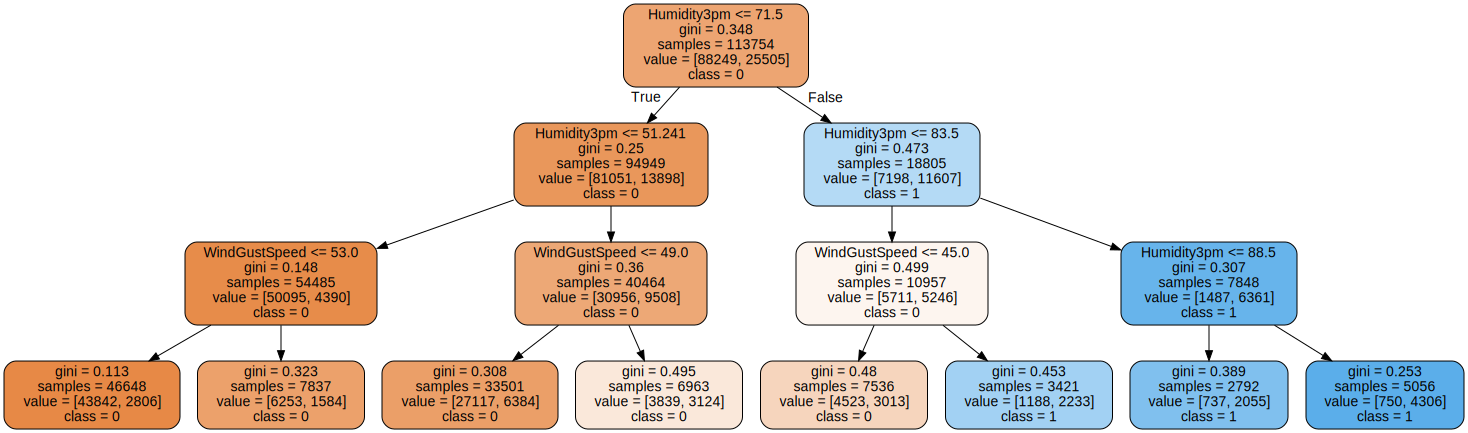

In [18]:
graph

In [19]:
fig = Plot_3D(X, X_test, y_test, clf, x1='WindGustSpeed', x2='Humidity3pm', mesh_size=1, margin=1)

/home/kansih/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



### CART classification model with unlimited tree depth

In [22]:
X = df[['WindGustSpeed', 'Humidity3pm']]
y = df['RainTomorrowFlag'].values

X_train, X_test, y_train, y_test, clf, graph = fitting(X, y, 'gini',
                                                        'best',
                                                        mdepth=None,
                                                        clweight=None,
                                                        minleaf=1000)

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  10
No. of leaves:  82
No. of features:  2
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.8335032877386688
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     22067
           1       0.73      0.40      0.52      6372

    accuracy                           0.83     28439
   macro avg       0.79      0.68      0.71     28439
weighted avg       0.82      0.83      0.81     28439

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.8316982259964485
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     88249
           1       0.73      0.40      0.52     25505

    accuracy                           0.83    113754
   macro avg       0.79      0.68  

/home/kansih/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning:

The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.



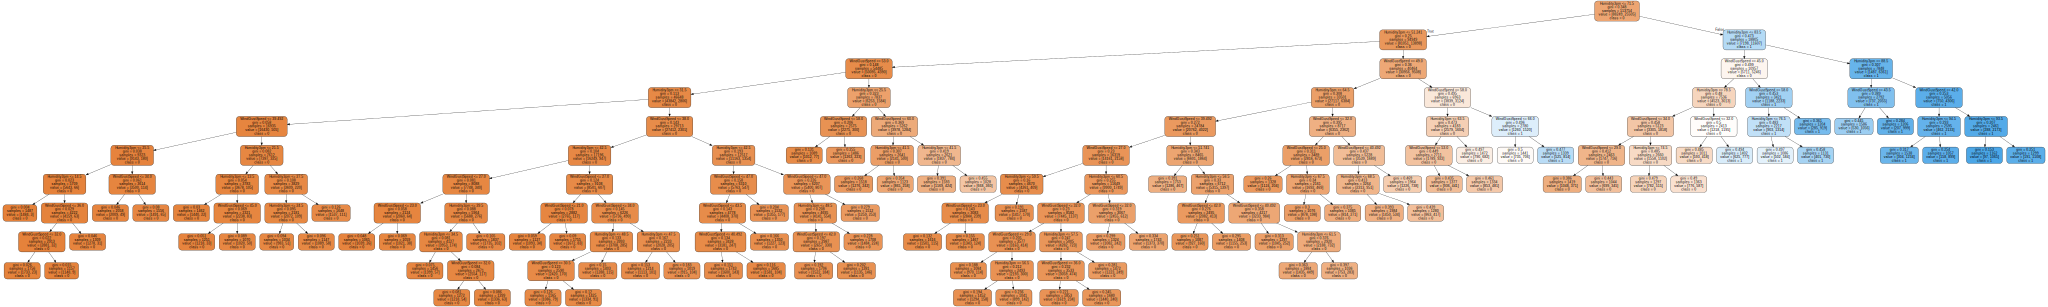

In [23]:
graph